In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 require

In [ ]:
from datasets import load_dataset

ds = load_dataset("traversaal-ai-hackathon/hotel_datasets")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/5997 [00:00<?, ? examples/s]

In [ ]:
!pip install pandas

In [ ]:
ds['train']

Dataset({
    features: ['hotel_name', 'hotel_description', 'review_title', 'review_text', 'rate', 'tripdate', 'hotel_url', 'hotel_image', 'price_range', 'rating_value', 'review_count', 'street_address', 'locality', 'country'],
    num_rows: 5997
})

In [ ]:
import pandas as pd

df = pd.DataFrame(ds['train'])

In [ ]:
df.head()

,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country
0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"An exceptional boutique hotel, great value for...",None,NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,You can’t get better than this.,None,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exceeds all expectations,None,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"Great Location, Fantastic Accommodations",None,NaN,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Perfection. It is all in the details.,None,NaN,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye


In [ ]:
len(df)

5997

In [ ]:
# no description available hotel names
df['hotel_name'][df['hotel_description'].isnull()].unique()

array(['Primero Hotel', 'Beacon Grand A Union Square Hotel',
       'Hilton San Francisco Financial District',
       'Cow Hollow Inn and Suites',
       'Parc 55 San Francisco - a Hilton Hotel',
       'Park Grand London Hyde Park', 'Travelodge London City hotel',
       'Leonardo Royal Hotel London Tower Bridge',
       'Travelodge London Docklands Central',
       'Travelodge London Central Kings Cross', 'Travelodge London Excel',
       'Travelodge London Central City Road', 'Royal National Hotel',
       'Palmers Lodge Swiss Cottage',
       'Tempo by Hilton New York Times Square',
       'Park Central Hotel New York', 'Hilton New York Times Square',
       'Hotel La Comtesse', 'Hotel B55', 'Citadines Tour Eiffel Paris'],
      dtype=object)

In [ ]:
len(df['hotel_name'][df['hotel_description'].isnull()].unique())

20

In [ ]:
df['hotel_description'][df['hotel_name'] == 'Primero Hotel'] = """Looking for a place to stay in Istanbul? Then look no further than Primero Hotel, a romantic hotel that brings the best of Istanbul to your doorstep.

Free wifi is offered to guests, and rooms at Primero Hotel offer air conditioning and a minibar.

During your stay, take advantage of some of the amenities offered, including room service. Guests of Primero Hotel are also welcome to enjoy free breakfast, located on site.

Nearby landmarks such as Suleymaniye Mosque (0.7 mi) and Istiklal Street (1.7 mi) make Primero Hotel a great place to stay when visiting Istanbul.

While visiting Istanbul, you may want to try some shrimp at one of the nearby restaurants, such as Olive Anatolian Restaurant, Old Ottoman Cafe & Restaurant, or Deraliye Ottoman Palace Cuisine Restaurant.

There is no shortage of things to do in the area: explore popular historic sites such as Hagia Sophia Museum / Church (Ayasofya), Basilica Cistern, and Galata Tower.

We’re sure you’ll enjoy your stay at Primero Hotel as you experience everything Istanbul has to offer."""

<ipython-input-50-e79d09593e4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Primero Hotel'] = """Looking for a place to stay in Istanbul? Then look no further than Primero Hotel, a romantic hotel that brings the best of Istanbul to your doorstep.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Beacon Grand A Union Square Hotel'] = """While many travelers consider the Beacon Grand A Union Square Hotel to be on the pricier side without fully delivering on expected amenities and services, cleanliness at the hotel receives high marks for its immaculate rooms and efficient housekeeping. The hotel basks in the glow of its historic charm and stylish atmosphere, although some guests report noise disturbances from the streets and neighboring rooms.

The central location is a major draw, offering easy access to the city's attractions. Despite mixed feedback on room sizes and amenities, the staff's friendliness and professionalism are often commended."""

<ipython-input-51-ad7f7febe006>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Beacon Grand A Union Square Hotel'] = """While many travelers consider the Beacon Grand A Union Square Hotel to be on the pricier side without fully delivering on expected amenities and services, cleanliness at the hotel receives high marks for its immaculate rooms and efficient housekeeping. The hotel basks in the glow of its historic charm and stylish atmosphere, although some guests report noise disturbances from the streets and neighboring rooms.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Hilton San Francisco Financial District'] = """Stay in a central location in San Francisco, California, surrounded by the bustling neighborhoods of North Beach, Chinatown and the Financial District. Soaring 27 floors above the vibrant city, the Hilton San Francisco Financial District hotel boasts stunning bay and city views. Enjoy a downtown retreat providing an easy walking distance to Moscone Convention Center, Union Square, Fisherman's Wharf, Market Street, Chase Center, Saleforce Tower, and the Embarcadero. Unwind after a busy day in San Francisco with a coffee or local Merlot at Flyte Coffee & Wine Bar while enjoying complimentary access to iPads. Dine on gourmet cuisine in the relaxed yet sophisticated atmosphere of 750 Restaurant & Bar. Boasting 20,000 sq. ft. of event space, this downtown San Francisco hotel is ideal for business or social gatherings. Enjoy a choice of contemporary meeting rooms and a Grand Ballroom with floor-to-ceiling windows and city views."""

<ipython-input-52-c8a3e669ec9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Hilton San Francisco Financial District'] = """Stay in a central location in San Francisco, California, surrounded by the bustling neighborhoods of North Beach, Chinatown and the Financial District. Soaring 27 floors above the vibrant city, the Hilton San Francisco Financial District hotel boasts stunning bay and city views. Enjoy a downtown retreat providing an easy walking distance to Moscone Convention Center, Union Square, Fisherman's Wharf, Market Street, Chase Center, Saleforce Tower, and the Embarcadero. Unwind after a busy day in San Francisco with a coffee or local Merlot at Flyte Coffee & Wine Bar while enjoying complimentary access to iPads. Dine on gourmet cuisine in

In [ ]:
df['hotel_description'][df['hotel_name'] == 'Cow Hollow Inn and Suites'] = """Finding an ideal motel in San Francisco does not have to be difficult. Welcome to Cow Hollow Inn and Suites, a nice option for travelers like you.

Rooms at Cow Hollow Hotel provide a flat screen TV and air conditioning, and guests can stay connected with free wifi.

In addition, while staying at Cow Hollow Hotel guests have access to a 24 hour front desk and baggage storage. Need a place to park? Free parking is available at Cow Hollow Hotel San Francisco.

For those interested in checking out popular landmarks while visiting San Francisco, Cow Hollow San Francisco is located a short distance from Fisherman's Wharf (1.3 mi) and Pier 39 (1.6 mi).

While visiting San Francisco, you may want to try some gyros at one of the nearby restaurants, such as Souvla, Oasis Grill, or Park Gyros.

There is no shortage of things to do in the area: explore popular military museums such as USS Pampanito and WWII Pacific War Memorial.

Cow Hollow Inn and Suites puts the best of San Francisco at your fingertips, making your stay both relaxing and enjoyable."""

<ipython-input-53-794705b7f551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Cow Hollow Inn and Suites'] = """Finding an ideal motel in San Francisco does not have to be difficult. Welcome to Cow Hollow Inn and Suites, a nice option for travelers like you.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Parc 55 San Francisco - a Hilton Hotel'] = """Daily Mandatory Destination Charge includes: Premium guest internet access; daily $35 food and beverage credit for use in on-site Cable 55 restaurant and off-site Hilton Union Square outlets; 2-hour e-bike rental for up to 2 guests.

Experience the cosmopolitan charm of San Francisco at Parc 55. Our location allows access to the city's most vibrant neighborhoods, each with a distinct personality: Union Square, Mid-Market, Fisherman's Wharf, North Beach, Chinatown, Japan Town, SOMA and the Mission. Parc 55 puts you in the heart of San Francisco's best shopping, dining, entertainment and more.

As part of the Hilton family of hotels, we understand the importance of quality and consistency, and value the loyalty of our returning guests. Combining top-of-the-line amenities and facilities with a boutique heart, Parc 55 offers personal connections through thoughtful service and attention to detail."""

<ipython-input-54-65988235e160>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Parc 55 San Francisco - a Hilton Hotel'] = """Daily Mandatory Destination Charge includes: Premium guest internet access; daily $35 food and beverage credit for use in on-site Cable 55 restaurant and off-site Hilton Union Square outlets; 2-hour e-bike rental for up to 2 guests.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Park Grand London Hyde Park'] = """Experience elegance and luxury at Park Grand Hyde Park Hotel, where contemporary sophistication meets timeless charm. Nestled in the heart of London, our boutique hotel offers an unparalleled blend of comfort and convenience. Indulge in stylishly designed rooms and suites, meticulously crafted to cater to your every need. Whether you're here for business or leisure, our attentive staff ensures a seamless stay from start to finish. Wake up to a sumptuous breakfast spread and explore the vibrant surroundings, including the iconic Hyde Park just moments away. Unwind in our tranquil spa or savor delectable cuisine at our onsite restaurant. With state-of-the-art facilities and impeccable service, Park Grand Hyde Park Hotel promises an unforgettable experience for discerning travelers. Book your stay with us and discover the epitome of luxury hospitality in London.remembering."""

<ipython-input-55-3b856db1972c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Park Grand London Hyde Park'] = """Experience elegance and luxury at Park Grand Hyde Park Hotel, where contemporary sophistication meets timeless charm. Nestled in the heart of London, our boutique hotel offers an unparalleled blend of comfort and convenience. Indulge in stylishly designed rooms and suites, meticulously crafted to cater to your every need. Whether you're here for business or leisure, our attentive staff ensures a seamless stay from start to finish. Wake up to a sumptuous breakfast spread and explore the vibrant surroundings, including the iconic Hyde Park just moments away. Unwind in our tranquil spa or savor delectable cuisine at our onsite restaurant. With sta

In [ ]:
df['hotel_description'][df['hotel_name'] == 'Leonardo Royal Hotel London Tower Bridge'] = """The Leonardo Royal Hotel London Tower Bridge is a favorite for its prime location close to iconic landmarks and convenient transport options. Guests often commend the high-quality amenities like the pool, gym, and spa, despite occasional remarks about overcrowding. The service gets high marks for staff friendliness and efficiency, contributing to the hotel's welcoming atmosphere.

Rooms are generally celebrated for their cleanliness and comfort, offering impressive views of the city. Opinions on value vary, with some guests considering it reasonable and others questioning the cost-benefit ratio."""

<ipython-input-56-ff8d44c632f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Leonardo Royal Hotel London Tower Bridge'] = """The Leonardo Royal Hotel London Tower Bridge is a favorite for its prime location close to iconic landmarks and convenient transport options. Guests often commend the high-quality amenities like the pool, gym, and spa, despite occasional remarks about overcrowding. The service gets high marks for staff friendliness and efficiency, contributing to the hotel's welcoming atmosphere.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Travelodge London Docklands Central'] = """Travelodge London Docklands Central garners appreciation for its clean and modern rooms, often highlighting the warm atmosphere, though noise and breakfast quality have been points of contention for some guests. While the hotel's location is lauded for its proximity to the O2 and transport links, others find it a bit removed from certain attractions. Guests commend the friendly staff, but service consistency seems to be a hit or miss.

Value perceptions are mixed due to additional costs for amenities and varying service quality, yet many find the rates reasonable. Cleanliness stands out as a strong suit, despite occasional critiques on room upkeep."""

<ipython-input-57-445be20f638f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Travelodge London Docklands Central'] = """Travelodge London Docklands Central garners appreciation for its clean and modern rooms, often highlighting the warm atmosphere, though noise and breakfast quality have been points of contention for some guests. While the hotel's location is lauded for its proximity to the O2 and transport links, others find it a bit removed from certain attractions. Guests commend the friendly staff, but service consistency seems to be a hit or miss.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Travelodge London Central Kings Cross'] = """Welcome to Travelodge London Central Kings Cross, your London “home away from home.” Travelodge London Central Kings Cross aims to make your visit as relaxing and enjoyable as possible, which is why so many guests continue to come back year after year.

Close to some of London's most popular landmarks, such as Covent Garden (1.3 mi) and Coca-Cola London Eye (1.9 mi), Travel Lodge London is a great destination for tourists.

Guest rooms offer a flat screen TV, and Travelodge London makes getting online easy as public wifi is available.

In addition, guests can enjoy breakfast during their visit.

While in London, you may want to check out some of the restaurants that are a short walk away from London Travelodge, including Hawksmoor Seven Dials (1.2 mi), Ye Olde Cheshire Cheese (1.2 mi), and ROKA Charlotte Street (1.0 mi).

Should time allow, The British Museum is a popular attraction that is within walking distance.

Travelodge London Central Kings Cross puts the best of London at your fingertips, making your stay both relaxing and enjoyable."""

<ipython-input-58-26b19e5faed9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Travelodge London Central Kings Cross'] = """Welcome to Travelodge London Central Kings Cross, your London “home away from home.” Travelodge London Central Kings Cross aims to make your visit as relaxing and enjoyable as possible, which is why so many guests continue to come back year after year.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Travelodge London Excel'] = """Finding an ideal quiet hotel in London does not have to be difficult. Welcome to Travelodge London Excel Hotel, a nice option for travelers like you.

Given the close proximity of popular landmarks, such as Up at The O2 (1.7 mi) and Crossrail Place Roof Garden (2.4 mi), guests of Travelodge London Excel Hotel can easily experience some of London's most well known attractions.

Public wifi is offered to guests, and rooms at Travelodge London Excel Hotel offer a flat screen TV.

Guests of Travelodge London Excel Hotel are also welcome to enjoy breakfast, located on site.

Travelers looking for Asian restaurants can head to ROKA Canary Wharf, Zaibatsu, or Kailash Momo Restaurant.

If you’re looking for something to do, The Crystal (1.1 mi) is a nice way to spend some time, and it is within walking distance of Travelodge London Excel Hotel.

Travelodge London Excel Hotel looks forward to welcoming you on your visit to London."""

<ipython-input-59-a3af31217d4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Travelodge London Excel'] = """Finding an ideal quiet hotel in London does not have to be difficult. Welcome to Travelodge London Excel Hotel, a nice option for travelers like you.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Travelodge London City hotel'] = """Travelodge London City hotel is an excellent choice for travelers visiting London, offering a family-friendly environment alongside many helpful amenities designed to enhance your stay.

You’ll enjoy relaxing rooms that offer a flat screen TV, and you can stay connected during your stay as Travelodge London City hotel offers guests paid wifi.

Plus, Travelodge London City hotel offers an on-site restaurant, providing a pleasant respite from your busy day.

Nearby landmarks such as Covent Garden (2.1 mi) and Coca-Cola London Eye (2.1 mi) make Travelodge London City hotel a great place to stay when visiting London.

While in London, you may want to check out some of the restaurants that are a short walk away from Travelodge London City hotel, including Coppa Club - Tower Bridge (0.5 mi), Duck and Waffle (0.3 mi), and Aqua Shard (0.9 mi).

Looking to explore? Then look no further than Tower of London (0.5 mi), Sky Garden (0.5 mi), and The View from The Shard (0.9 mi), which are some popular London attractions – all conveniently located within walking distance of the hotel.

Enjoy your stay in London!"""

<ipython-input-74-8a2f4c07509c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Travelodge London City hotel'] = """Travelodge London City hotel is an excellent choice for travelers visiting London, offering a family-friendly environment alongside many helpful amenities designed to enhance your stay.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Travelodge London Central City Road'] = """Finding an ideal family-friendly hotel in London does not have to be difficult. Welcome to Travelodge London Central City Road, a nice option for travelers like you.

Travel Lodge London is a family-friendly hotel offering a flat screen TV and a desk in the rooms, and it is easy to stay connected during your stay as internet access is offered to guests.

The hotel features a 24 hour front desk and 24 hour check-in. Plus, guests can enjoy breakfast, which has made this a popular choice among travelers visiting London.

Close to some of London's most popular landmarks, such as The View from The Shard (1.3 mi) and Tower Bridge (1.3 mi), Travelodge London Central Moorgate Hotel is a great destination for tourists.

If you like Asian restaurants, London Travel Lodge is conveniently located near Dishoom Covent Garden, SUSHISAMBA Liverpool Street, and StreetXO.

Plus, during your trip, don’t forget to check out some of the popular history museums, such as The British Museum, Natural History Museum, and Churchill War Rooms.

Travelodge London Central City Road puts the best of London at your fingertips, making your stay both relaxing and enjoyable."""

<ipython-input-60-fde4982388bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Travelodge London Central City Road'] = """Finding an ideal family-friendly hotel in London does not have to be difficult. Welcome to Travelodge London Central City Road, a nice option for travelers like you.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Royal National Hotel'] = """Our unique and lively hotel located in the heart of Russell Square, near Euston and Kings Cross, at the Royal National we offer a choice of room types to suit all occasions, from leisure breaks to business travel in Bloomsbury, central London. If travelling on a budget, our standard rooms are extremely good value - providing clean and comfortable accommodation in the heart of London. Our Standard Plus rooms offer a touch more sophistication, with an earthy colour palette and contemporary furnishings. Fancy a bite to eat? Blooms Café serves up great coffee and delicious stone baked pizzas, whilst our London Pub offers British traditional dishes. Dine alfresco in our cosy courtyard, from a thoughtful menu of pub favourites, alongside local craft beers."""

<ipython-input-61-5f73b3cf5c24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Royal National Hotel'] = """Our unique and lively hotel located in the heart of Russell Square, near Euston and Kings Cross, at the Royal National we offer a choice of room types to suit all occasions, from leisure breaks to business travel in Bloomsbury, central London. If travelling on a budget, our standard rooms are extremely good value - providing clean and comfortable accommodation in the heart of London. Our Standard Plus rooms offer a touch more sophistication, with an earthy colour palette and contemporary furnishings. Fancy a bite to eat? Blooms Café serves up great coffee and delicious stone baked pizzas, whilst our London Pub offers British traditional dishes. Dine a

In [ ]:
df['hotel_description'][df['hotel_name'] == 'Palmers Lodge Swiss Cottage'] = """Palmers Lodge Swiss Cottage garners praise for its cleanliness, particularly the bathrooms, and the amenities such as comfortable beds with privacy curtains contribute to a satisfying stay. While opinions on value and room sizes vary, the hostel's prime location near public transport is a highlight for visitors.

The service receives mixed reviews, with commendations for staff friendliness but some negative experiences. Guests enjoy the private, chic atmosphere of the old mansion setting, despite some concerns about room airflow and noise."""

<ipython-input-62-936c0b94e0e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Palmers Lodge Swiss Cottage'] = """Palmers Lodge Swiss Cottage garners praise for its cleanliness, particularly the bathrooms, and the amenities such as comfortable beds with privacy curtains contribute to a satisfying stay. While opinions on value and room sizes vary, the hostel's prime location near public transport is a highlight for visitors.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Tempo by Hilton New York Times Square'] = """Daily Mandatory Destination Charge includes: Premium guest internet access; daily $10 food and beverage credit for use in all hotel outlets (Market excluded); City Bike rentals for two; daily $25 parking credit. Tempo Times Square is located steps from world-famous theaters, restaurants and shops. Central Park, Radio City Music Hall, Rockefeller Center, and much more are just minutes from the hotel. Grab a drink at our Outdoor Terrace while overlooking the heart of the city or sit down to enjoy the views from our full-service restaurant. Thoughtfully designed, uplifting, and within reach, Tempo empowers guests to maintain their momentum. No matter how you travel, we are here to help you keep your pace."""

<ipython-input-63-2cc98d4f6da6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Tempo by Hilton New York Times Square'] = """Daily Mandatory Destination Charge includes: Premium guest internet access; daily $10 food and beverage credit for use in all hotel outlets (Market excluded); City Bike rentals for two; daily $25 parking credit. Tempo Times Square is located steps from world-famous theaters, restaurants and shops. Central Park, Radio City Music Hall, Rockefeller Center, and much more are just minutes from the hotel. Grab a drink at our Outdoor Terrace while overlooking the heart of the city or sit down to enjoy the views from our full-service restaurant. Thoughtfully designed, uplifting, and within reach, Tempo empowers guests to maintain their moment

In [ ]:
df['hotel_description'][df['hotel_name'] == 'Park Central Hotel New York'] = """Park Central Hotel New York | The Midtown Manhattan Hotel Hotel located in the heart of Manhattan Built during The Roaring Twenties, the Park Central Hotel New York once accommodated and entertained some of the most influential figures of the day - from Jackie Gleason and Mae West to Glenn Miller and Tommy Dorsey, even First Lady Eleanor Roosevelt. Today's guests are invited to escape the busy city life in exchange for the serenity that awaits them at the Park Central Hotel near Rockefeller Center - newly renovated and inspired by the iconic Central Park and renowned New York City landmarks."""

<ipython-input-64-26edc359080b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Park Central Hotel New York'] = """Park Central Hotel New York | The Midtown Manhattan Hotel Hotel located in the heart of Manhattan Built during The Roaring Twenties, the Park Central Hotel New York once accommodated and entertained some of the most influential figures of the day - from Jackie Gleason and Mae West to Glenn Miller and Tommy Dorsey, even First Lady Eleanor Roosevelt. Today's guests are invited to escape the busy city life in exchange for the serenity that awaits them at the Park Central Hotel near Rockefeller Center - newly renovated and inspired by the iconic Central Park and renowned New York City landmarks."""


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Hilton New York Times Square'] = """Daily Mandatory Destination Charge includes: Premium guest internet access: daily $35 food and beverage credit for use in the hotel restaurants and bars: bicycle rentals.Set in the heart of Times Square at the crossroads of Broadway & 42nd Street, our hotel soars 44 floors above Manhattan. Enjoy panoramic views from our oversized guestrooms and sky-level restaurant.

Broadway's iconic theaters, shopping, and restaurants are just outside the door. Within a mile you'll find staple New York City sites such as the Empire State Building, Madison Square Garden, Rockefeller Center, Hudson Yards, Grand Central Station, and Bryant Park. Offering 478 oversized guest rooms, 330-360 sq. ft., with sleek decor, spectacular panoramic views and high-end amenities. Restaurant Above overlooks Times Square and is open for breakfast.

Additional hotel amenities include Pinnacle Bar, chic lobby lounge, and 24-hour fitness center. The hotel is 100 percent non-smoking. The hotel allows pets under 75 lbs."""

<ipython-input-65-419c10e9fc00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Hilton New York Times Square'] = """Daily Mandatory Destination Charge includes: Premium guest internet access: daily $35 food and beverage credit for use in the hotel restaurants and bars: bicycle rentals.Set in the heart of Times Square at the crossroads of Broadway & 42nd Street, our hotel soars 44 floors above Manhattan. Enjoy panoramic views from our oversized guestrooms and sky-level restaurant.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Hotel B55'] = """Come to visit Paris, and stay in a hotel where you will be taking care of! Indeed, our 4-star hotel offers a SPA with a pool, chic and comfortable rooms, and tastings of great wines. We offer you more than just a hotel stay ... We offer you the opportunity to be pampered!
A place of well-being, peace, and enchantment in Paris, the B55 Spa is designed for intense relaxation. This place, flooded with natural light, will allow you to relax and rest after a busy day visiting Paris. Indeed, every detail has been thought to create a feeling of harmony and well-being.
Our Spa includes a interior swimming pool. Come experience a journey of the senses at Hotel B55!"""

<ipython-input-71-132a602ed983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Hotel B55'] = """Come to visit Paris, and stay in a hotel where you will be taking care of! Indeed, our 4-star hotel offers a SPA with a pool, chic and comfortable rooms, and tastings of great wines. We offer you more than just a hotel stay ... We offer you the opportunity to be pampered!


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Hotel La Comtesse'] = """Finding an ideal romantic hotel in Paris does not have to be difficult. Welcome to Hotel La Comtesse, a nice option for travelers like you.

The rooms offer a flat screen TV, air conditioning, and a minibar, and getting online is possible, as free wifi is available, allowing you to rest and refresh with ease.

Hotel La Comtesse features a 24 hour front desk, a concierge, and room service. In addition, as a valued Hotel La Comtesse guest, you can enjoy a fitness center and breakfast that are available on-site. Guests arriving by vehicle have access to parking.

For those interested in checking out popular landmarks while visiting Paris, Hotel La Comtesse is located a short distance from Louvre Museum (1.4 mi) and Arc de Triomphe (1.5 mi).

While in Paris, you may want to check out some of the restaurants that are a short walk away from Hotel La Comtesse, including 58 Tour Eiffel (0.7 mi), Le Jules Verne (0.6 mi), and L'Avenue (0.9 mi).

During your visit, be sure to check out popular attractions like Eiffel Tower (0.6 mi), Musée d'Orsay (1.0 mi), and Champs-Elysees (1.1 mi), which are all within walking distance of the hotel.

Hotel La Comtesse puts the best of Paris at your fingertips, making your stay both relaxing and enjoyable."""

<ipython-input-72-0b9685327a31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Hotel La Comtesse'] = """Finding an ideal romantic hotel in Paris does not have to be difficult. Welcome to Hotel La Comtesse, a nice option for travelers like you.


In [ ]:
df['hotel_description'][df['hotel_name'] == 'Citadines Tour Eiffel Paris'] = """L'apart'hotel Citadines Tour Eiffel Paris est situé sur le boulevard de Grenelle au pied de la station de métro La Motte Picquet Grenelle, desservie par 3 lignes. A pied, vous pourrez rejoindre le Champs de Mars en 8 mn, la Tour Eiffel en 15 mn et l'Hôtel des Invalides en 18 mn. Les studios et appartements climatisés disposent d'un accès gratuit au wifi haut débit, d'une TV à écran plat et d'un coffre-fort. Tous sont dotés d'une cuisine entièrement équipée avec plaques de cuisson, micro-ondes, réfrigérateur et lave-vaisselle, ainsi que d'une salle de bain avec baignoire pour la plupart des logements. La résidence vous propose des boissons chaudes offertes dans le lobby, un espace petit-déjeuner, un business corner et un jardin avec terrasse. Une réception 24h/24 est à votre disposition. Services à la carte : laverie automatique, blanchisserie et nettoyage à sec, baby-sitting. Parking privé payant, selon disponibilité."""

<ipython-input-67-cd6e408a1e87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel_description'][df['hotel_name'] == 'Citadines Tour Eiffel Paris'] = """L'apart'hotel Citadines Tour Eiffel Paris est situé sur le boulevard de Grenelle au pied de la station de métro La Motte Picquet Grenelle, desservie par 3 lignes. A pied, vous pourrez rejoindre le Champs de Mars en 8 mn, la Tour Eiffel en 15 mn et l'Hôtel des Invalides en 18 mn. Les studios et appartements climatisés disposent d'un accès gratuit au wifi haut débit, d'une TV à écran plat et d'un coffre-fort. Tous sont dotés d'une cuisine entièrement équipée avec plaques de cuisson, micro-ondes, réfrigérateur et lave-vaisselle, ainsi que d'une salle de bain avec baignoire pour la plupart des logements. La résidence vous propose des boissons chaud

In [ ]:
df['hotel_description'].str.len().unique()

array([ 893.,  190.,  598.,  843.,  967.,  208., 2052.,  488., 1197.,
       1047., 1500.,  755.,  560.,  428.,  642.,  915.,  417., 1130.,
        969.,  387.,  956.,  851., 1520.,  684., 1157.,   43.,  489.,
        494.,  807., 1074.,  776.,  618., 1239.,  771.,  709.,  431.,
        333.,  627.,  478.,  286.,  366.,  413.,  707.,  412.,  465.,
       1314.,  513.,  886.,  280.,  948.,  936.,  833., 1055.,  869.,
        529., 1107.,  905.,  992.,  883., 1419.,   nan,  984.,   77.,
        375., 1434., 1260.,  429.,  602.,  656.,  317.,  108., 1057.,
        935.,  320.,  402.,  266., 1158.,  760.,  845.,  127., 1741.,
        687.,  989.,  545.,  658.,  553.,  597., 1019.,  837.,  924.,
        607.,  896.,  482.,  711.,  288.,  746.,  535.,  887.,  655.,
         26.,  291.,  970.,  521.,  552.,  384.,  996.,  381.,  818.,
        600.,  479.,  765.,  686.,  329.,  873.,  698.,  503.,  439.,
        359.,  953., 1256.,  993.,  849.,  476., 1324.,  318., 1261.,
        831.,  546.,

In [ ]:
len(df['hotel_name'].unique())

150

In [ ]:
# no description available hotel names
df['hotel_name'][df['hotel_description'].isnull()].unique()

array([], dtype=object)

In [ ]:
df.to_csv('full_description.csv', index=False)

In [ ]:
df.iloc[0]

,0
hotel_name,Romance Istanbul Hotel
hotel_description,Romance Istanbul Hotel has 39 rooms.Every room...
review_title,"An exceptional boutique hotel, great value for..."
review_text,None
rate,NaN
tripdate,February 2020
hotel_url,https://www.tripadvisor.com/Hotel_Review-g2939...
hotel_image,https://media-cdn.tripadvisor.com/media/photo-...
price_range,$ (Based on Average Nightly Rates for a Standa...
rating_value,5.0


In [ ]:
dict = {
    'hotel_name': df.iloc[0].hotel_name,
    'hotel_description': df.iloc[0].hotel_name
    }
dict

{'hotel_name': 'Romance Istanbul Hotel',
 'hotel_description': 'Romance Istanbul Hotel'}

Hotel Name: Marriott Marquis San Francisco
Description: Rest easy at Marriott Marquis San Francisco. Our San Francisco, California, hotel is located near Moscone Convention Center, Chase Center, and Oracle Park. After a busy day, unwind in our 24-Hour COR Health and Fitness Center, or enjoy on-site dining at B55 Craft House & Kitchen.
Rating: 1.0
Price Range: $$
Hotel URL: https://www.tripadvisor.com/Hotel_Review-g60713-d81315-Reviews-Marriott_Marquis_San_Francisco-San_Francisco_California.html
Rating Value: 4.0
Review Count: 8192
Country: United States
City: San Francisco
Street Address: 780 Mission Street



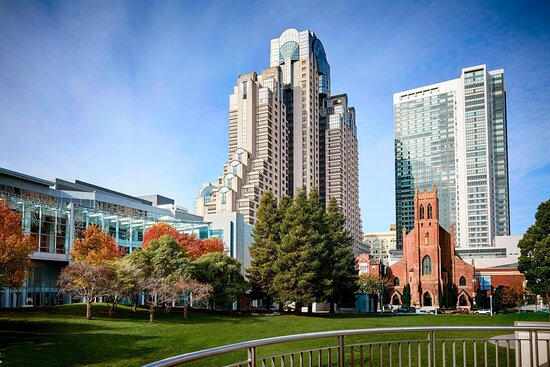

In [100]:
import re
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def display_hotel_metadata(df, index):

    hotel_data = df.iloc[index]

    metadata = (
        f"Hotel Name: {hotel_data['hotel_name']}\n"
        f"Description: {hotel_data['hotel_description']}\n"
        f"Rating: {hotel_data['rate']}\n"
        f"Price Range: {re.sub('[^$]', '', hotel_data['price_range'])}\n"
        f"Hotel URL: {hotel_data['hotel_url']}\n"
        f"Rating Value: {hotel_data['rating_value']}\n"
        f"Review Count: {hotel_data['review_count']}\n"
        f"Country: {hotel_data['country']}\n"
        f"City: {hotel_data['locality']}\n"
        f"Street Address: {hotel_data['street_address']}\n"
    )
    response = requests.get(hotel_data['hotel_image'])

    print(metadata)
    img = Image.open(BytesIO(response.content))
    display(img)

display_hotel_metadata(df, 2000)

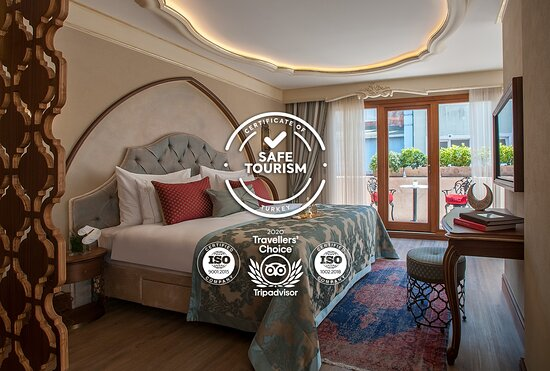

In [95]:
display(img)